In [1]:
import networkx as nx
from imdb_code import get_movie_descriptions_by_actor_soup
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imdb_helper_functions import get_actor_page_soup

% matplotlib inline

Read distance data from distance.csv

In [3]:
distances_df = pd.read_csv('distance.csv')
distances_df = distances_df.set_index('Actor Pairs')

In [4]:
distances_df = distances_df.iloc[:, 1:]

In [5]:
distances_df

,Start_Actor,End_Actor,Distance
Actor Pairs,,,
"('Dwayne Johnson', 'Chris Hemsworth')",Dwayne Johnson,Chris Hemsworth,2
"('Dwayne Johnson', 'Robert Downey Jr.')",Dwayne Johnson,Robert Downey Jr.,2
"('Dwayne Johnson', 'Scarlett Johansson')",Dwayne Johnson,Scarlett Johansson,2
"('Dwayne Johnson', 'Chris Evans')",Dwayne Johnson,Chris Evans,2
"('Chris Hemsworth', 'Robert Downey Jr.')",Chris Hemsworth,Robert Downey Jr.,1
"('Chris Hemsworth', 'Jackie Chan')",Chris Hemsworth,Jackie Chan,2
"('Chris Hemsworth', 'Scarlett Johansson')",Chris Hemsworth,Scarlett Johansson,1
"('Chris Evans', 'Chris Hemsworth')",Chris Evans,Chris Hemsworth,1
"('Robert Downey Jr.', 'Scarlett Johansson')",Robert Downey Jr.,Scarlett Johansson,1


In [6]:
distance_list = distances_df.iloc[:,2].to_dict()
distance_list

{"('Dwayne Johnson', 'Chris Hemsworth')": 2,
 "('Dwayne Johnson', 'Robert Downey Jr.')": 2,
 "('Dwayne Johnson', 'Scarlett Johansson')": 2,
 "('Dwayne Johnson', 'Chris Evans')": 2,
 "('Chris Hemsworth', 'Robert Downey Jr.')": 1,
 "('Chris Hemsworth', 'Jackie Chan')": 2,
 "('Chris Hemsworth', 'Scarlett Johansson')": 1,
 "('Chris Evans', 'Chris Hemsworth')": 1,
 "('Robert Downey Jr.', 'Scarlett Johansson')": 1,
 "('Bradley Cooper', 'Scarlett Johansson')": 1,
 "('Bradley Cooper', 'Chris Evans')": 1,
 "('Adam Sandler', 'Scarlett Johansson')": 2,
 "('Chris Evans', 'Scarlett Johansson')": 1,
 "('Sofia Vergara', 'Chris Evans')": 2,
 "('Chris Evans', 'Robert Downey Jr.')": 1,
 "('Dwayne Johnson', 'Jackie Chan')": 2,
 "('Bradley Cooper', 'Dwayne Johnson')": 2,
 "('Adam Sandler', 'Dwayne Johnson')": 2,
 "('Dwayne Johnson', 'Sofia Vergara')": 2,
 "('Bradley Cooper', 'Chris Hemsworth')": 2,
 "('Adam Sandler', 'Chris Hemsworth')": 2,
 "('Chris Hemsworth', 'Sofia Vergara')": 2,
 "('Jackie Chan', 'Ad

In [7]:
distances = {}
distances_1 = {}
distances_2 = {}
for key, value in distance_list.items():
    distances[eval(key)] = value
    if value == 1:
        distances_1[eval(key)] = value
    else:
        distances_2[eval(key)] = value

Network Graph

In [8]:
G = nx.DiGraph()
edge_lists_1 = []
edge_lists_2 = []
for key, value in distances.items():
    (start_actor, end_actor) = key
    if value == 1:
        G.add_edge(start_actor, end_actor, edge_color = 'green')
    elif value == 2:
       G.add_edge(start_actor, end_actor, edge_color = 'red')

In [9]:
edge_lists_1 = [(u, v) for (u, v, d) in G.edges(data=True) if d['edge_color'] == 'green']
print(edge_lists_1)

[('Chris Hemsworth', 'Robert Downey Jr.'), ('Chris Hemsworth', 'Scarlett Johansson'), ('Robert Downey Jr.', 'Scarlett Johansson'), ('Robert Downey Jr.', 'Sofia Vergara'), ('Scarlett Johansson', 'Sofia Vergara'), ('Chris Evans', 'Chris Hemsworth'), ('Chris Evans', 'Scarlett Johansson'), ('Chris Evans', 'Robert Downey Jr.'), ('Bradley Cooper', 'Scarlett Johansson'), ('Bradley Cooper', 'Chris Evans'), ('Bradley Cooper', 'Robert Downey Jr.')]


In [10]:
edge_lists_2 = [(u, v) for (u, v, d) in G.edges(data=True) if d['edge_color'] == 'red']
print(edge_lists_2)

[('Dwayne Johnson', 'Chris Hemsworth'), ('Dwayne Johnson', 'Robert Downey Jr.'), ('Dwayne Johnson', 'Scarlett Johansson'), ('Dwayne Johnson', 'Chris Evans'), ('Dwayne Johnson', 'Jackie Chan'), ('Dwayne Johnson', 'Sofia Vergara'), ('Chris Hemsworth', 'Jackie Chan'), ('Chris Hemsworth', 'Sofia Vergara'), ('Jackie Chan', 'Adam Sandler'), ('Jackie Chan', 'Robert Downey Jr.'), ('Jackie Chan', 'Scarlett Johansson'), ('Jackie Chan', 'Chris Evans'), ('Jackie Chan', 'Sofia Vergara'), ('Jackie Chan', 'Bradley Cooper'), ('Bradley Cooper', 'Dwayne Johnson'), ('Bradley Cooper', 'Chris Hemsworth'), ('Bradley Cooper', 'Sofia Vergara'), ('Adam Sandler', 'Scarlett Johansson'), ('Adam Sandler', 'Dwayne Johnson'), ('Adam Sandler', 'Chris Hemsworth'), ('Adam Sandler', 'Robert Downey Jr.'), ('Adam Sandler', 'Chris Evans'), ('Adam Sandler', 'Sofia Vergara'), ('Adam Sandler', 'Bradley Cooper'), ('Adam Sandler', 'Akshay Kumar'), ('Sofia Vergara', 'Chris Evans'), ('Akshay Kumar', 'Chris Hemsworth'), ('Akshay K

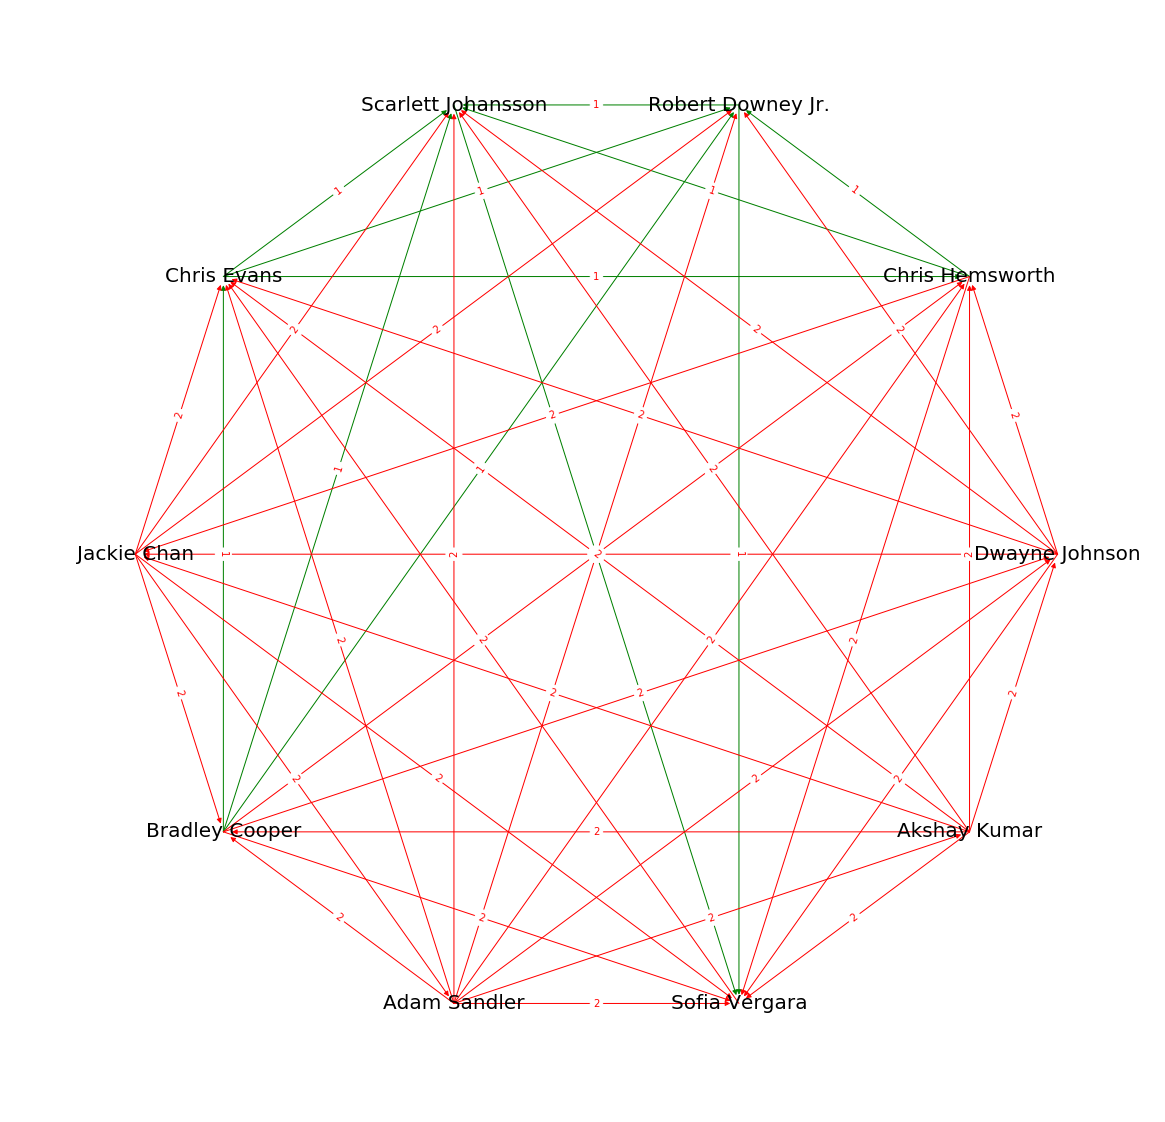

In [11]:
pos = nx.circular_layout(G)
fig = plt.figure(figsize=[20, 20])
nx.draw_networkx_edges(G, pos, edgelist= edge_lists_1, edge_color='green')
nx.draw_networkx_edges(G, pos, edgelist= edge_lists_2, edge_color='red')
nx.draw_networkx_labels(G, pos, font_size = 20, font_family = 'sans-serif')
nx.draw_networkx_edge_labels(G,pos,edge_labels=distances,font_color='red')
plt.axis('off')
plt.draw()

Graph for distance of 1

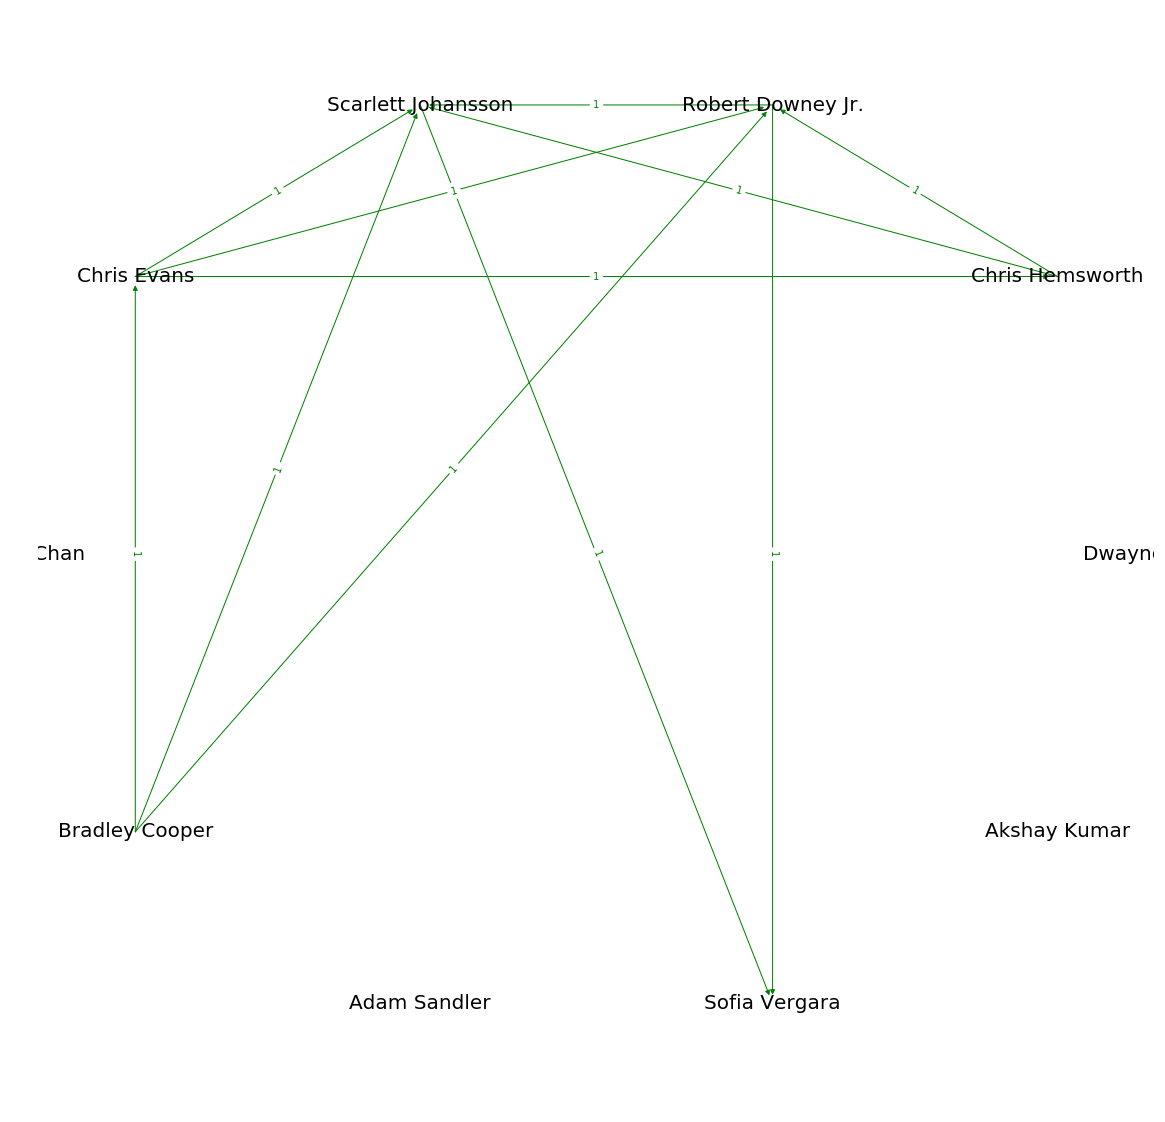

In [13]:
pos = nx.circular_layout(G)
fig = plt.figure(figsize=[20, 20])
nx.draw_networkx_edges(G, pos, edgelist= edge_lists_1, edge_color='green')
nx.draw_networkx_labels(G, pos, font_size = 20, font_family = 'sans-serif')
nx.draw_networkx_edge_labels(G,pos,edge_labels=distances_1,font_color='green')
plt.axis('off')
plt.draw()

Graph for distance 2

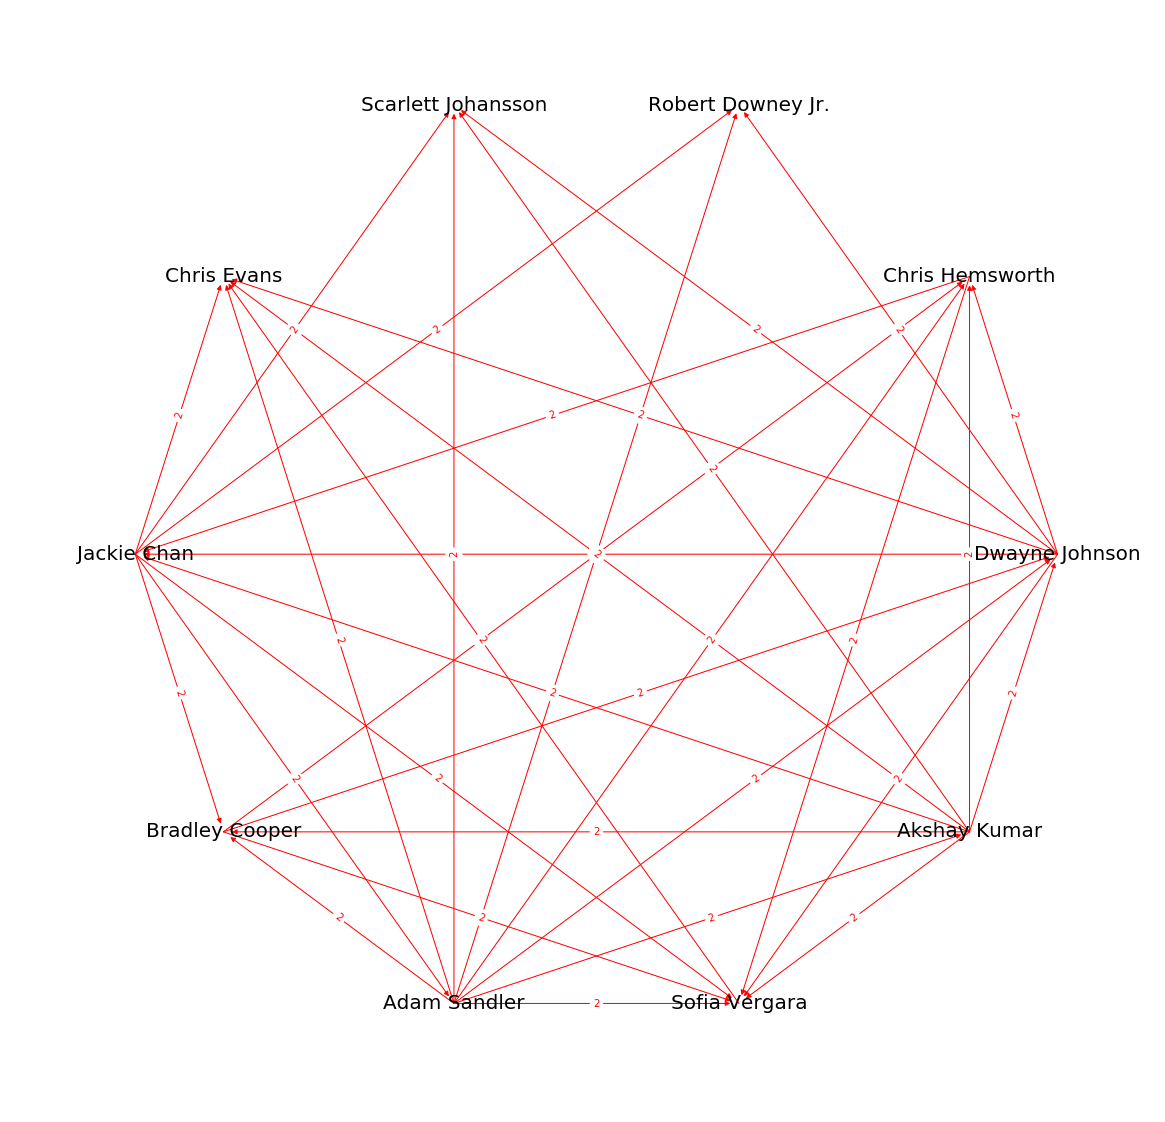

In [14]:
pos = nx.circular_layout(G)
fig = plt.figure(figsize=[20, 20])
nx.draw_networkx_edges(G, pos, edgelist= edge_lists_2, edge_color='red')
nx.draw_networkx_labels(G, pos, font_size = 20, font_family = 'sans-serif')
nx.draw_networkx_edge_labels(G,pos,edge_labels=distances_2,font_color='red')
plt.axis('off')
plt.draw()

In [17]:
actors = {
    'Dwayne Johnson': 'https://www.imdb.com/name/nm0425005/', 
    'Chris Hemsworth': 'https://www.imdb.com/name/nm1165110/', 
    'Robert Downey Jr.': 'https://www.imdb.com/name/nm0000375/',
    'Akshay Kumar': 'https://www.imdb.com/name/nm0474774/', 
    'Jackie Chan': 'https://www.imdb.com/name/nm0000329/', 
    'Bradley Cooper': 'https://www.imdb.com/name/nm0177896/', 
    'Adam Sandler': 'https://www.imdb.com/name/nm0001191/',
    'Scarlett Johansson': 'https://www.imdb.com/name/nm0424060/', 
    'Sofia Vergara': 'https://www.imdb.com/name/nm0005527/' ,
    'Chris Evans': 'https://www.imdb.com/name/nm0262635/'
}

Wordcloud

Step1: We save movie descriptions for each actor to .txt file

In [23]:
def save_description_to_txt():
    for actor_name, actor_url in actors.items():
        actor_page_soup = get_actor_page_soup(actor_url)

        with open (f"{actor_name}.txt", "w") as file:
            movie_description = get_movie_descriptions_by_actor_soup(actor_page_soup)
            file.write(('').join(movie_description))
    
    print('finished saving')

In [24]:
save_description_to_txt()

finished saving


In [25]:
stop_words = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

In [28]:
def generate_word_cloud():
    for actor_name, _ in actors.items():
        with open(f"{actor_name}.txt", 'r') as file:
            print(actor_name)
            text = file.read()
            wordcloud = WordCloud(stopwords = stop_words).generate(text)

            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.show()

Dwayne Johnson


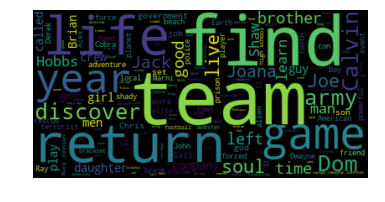

Chris Hemsworth


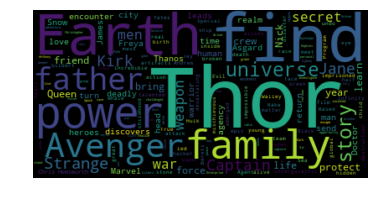

Robert Downey Jr.


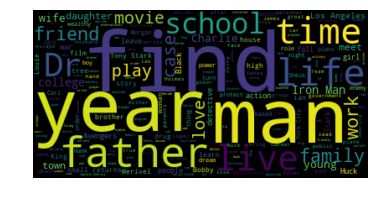

Akshay Kumar


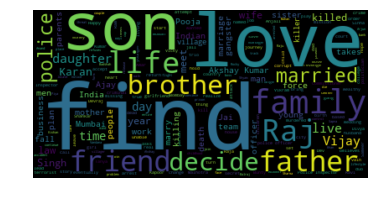

Jackie Chan


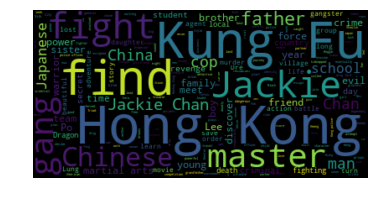

Bradley Cooper


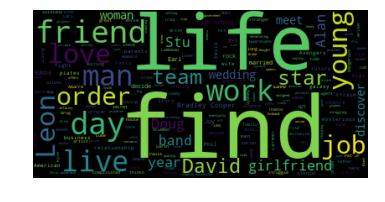

Adam Sandler


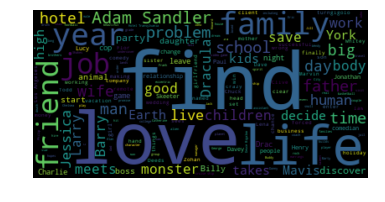

Scarlett Johansson


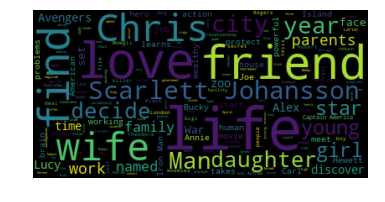

Sofia Vergara


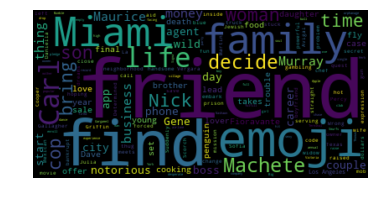

Chris Evans


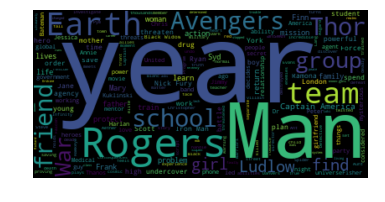

In [29]:
generate_word_cloud()